# Notebook Import and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Example 1

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
def df(x):
    return 2*x + 1

In [5]:
#Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

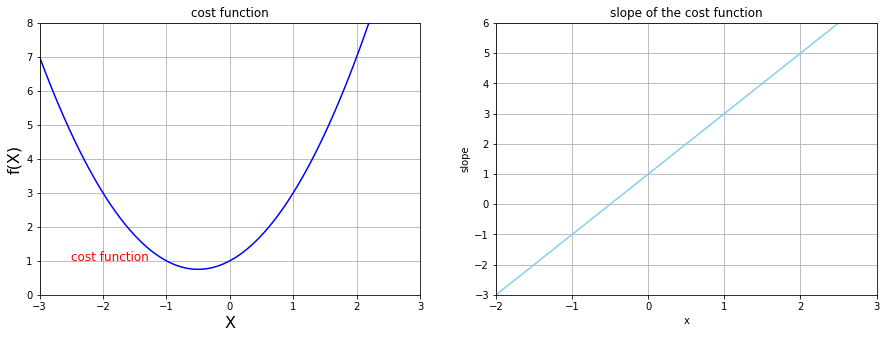

In [6]:
# plot function and derivative side by side

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('cost function')
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('slope of the cost function')
plt.grid()
plt.show()

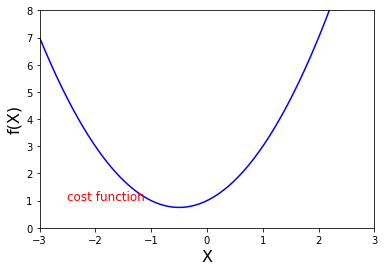

In [7]:
# plot
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
plt.show()

## Python Loops & Gradient Descent

In [8]:
#Gradient Descent
new_x = 3
previous_x = 0
step_mp = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_mp * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    # print(step_size)
    if step_size < precision:
        print(f'Loop counter is {n}')
        break
print(f'Local minimum us at {new_x}')
print(f'Slop or df(x) at this point is: {df(new_x)}')
print(f'f(x) value or cost at this point is: {f(new_x)}')


Loop counter is 61
Local minimum us at -0.4999965672099885
Slop or df(x) at this point is: 6.8655800230521535e-06
f(x) value or cost at this point is: 0.750000000011784


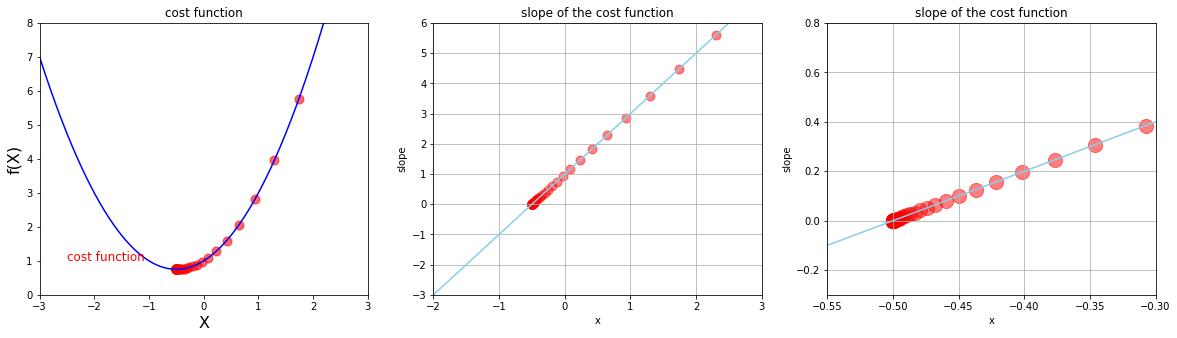

In [9]:
# superimpose the gradient descent calculation on plot 

# 1 chart: cost function
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('cost function')
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize = 16)
plt.text(-2.5, 1 , 'cost function', c='red', fontsize=12)
plt.plot(x_1, f(x_1), 'blue')
#since f function cant read lists, we'll have to converst it to an np array:
values = np.array(x_list)
plt.scatter(x_list, f(values), c='red', s=80, alpha=0.6)
# an alternative way is this:            
# vals = list(map(f,x_list))
# plt.scatter(x_list, vals)



# 2 chartL Derivative
plt.subplot(1, 3, 2)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('slope of the cost function')
plt.scatter(x_list, slope_list, c='red', s=80, alpha=0.5)
plt.grid()

# 3 chart: Derivative closeup
plt.subplot(1, 3, 3)
plt.plot(x_1, df(x_1), c='skyblue')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-0.55,-0.3)
plt.ylim(-0.3,0.8)
plt.title('slope of the cost function')
plt.scatter(x_list, slope_list, c='red', s=200, alpha=0.5)
plt.grid()
plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advamced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)
def g(x):
    return x**4 -4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x
    

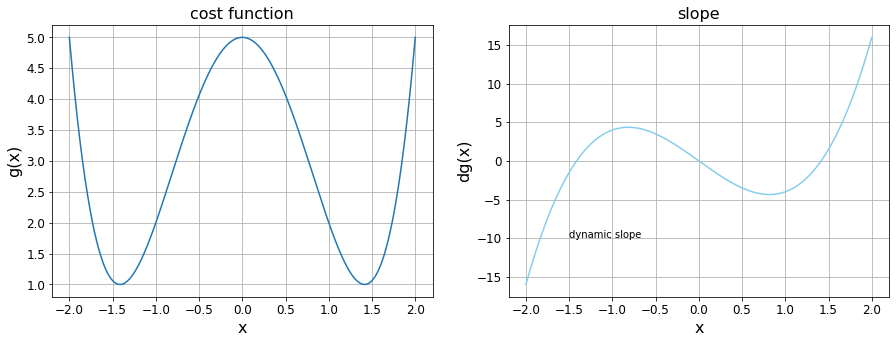

In [11]:
#ploting the curve and the slope

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, g(x_2))
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('cost function', fontsize=16)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.grid()

plt.show()

## Gradient Descent

## Gradient Descent as a Python Function

In [12]:
def gradient_descent(d_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    new_x = initial_guess


    x_list = [new_x]
    slope_list = [d_func(new_x)]
    iterations=[0]
    counter=1

    for n in range(max_iter):
        previous_x = new_x
        gradient = d_func(previous_x)
        new_x = previous_x - multiplier * gradient
        iterations.append(counter)
        counter+=1

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(d_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list, iterations

In [13]:
local_min, list_x, deriv_list, it_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
      

Local min is at 1.4122375085019094
Number of steps: 23


In [14]:
local_min, list_x, deriv_list, it_list = gradient_descent(dg, -0.1)
print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
      

Local min is at -1.4120887490901561
Number of steps: 34


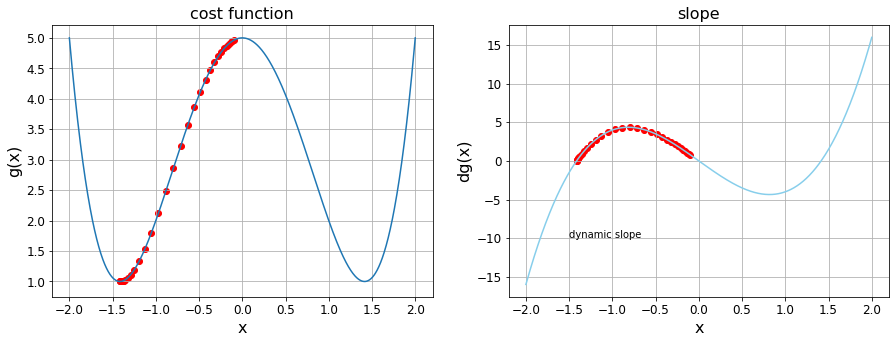

In [15]:
#ploting the curve and the slope in GD

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, g(x_2))
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('cost function', fontsize=16)
values = np.array(list_x)
plt.scatter(list_x, g(values), c='red')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.scatter(list_x, deriv_list, c='red')
plt.grid()

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 -2x^4 +2$$

In [16]:
#Make Data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

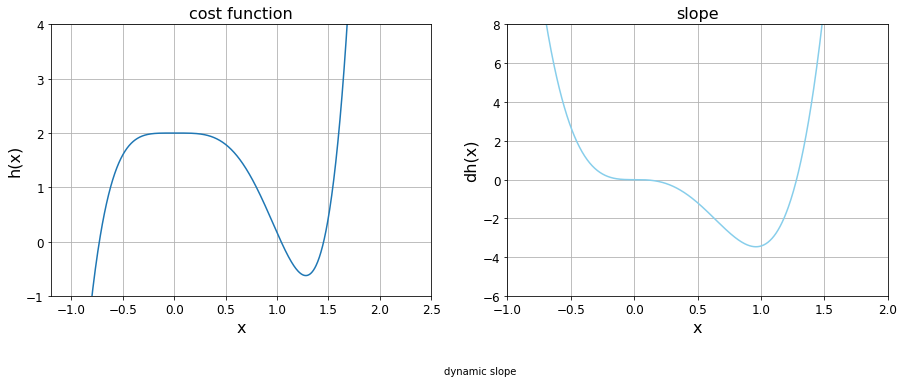

In [17]:
#ploting the curve and the slope

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_2, h(x_3))
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('cost function', fontsize=16)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_2, dh(x_3), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1,2)
plt.ylim(-6,8)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.grid()

plt.show()

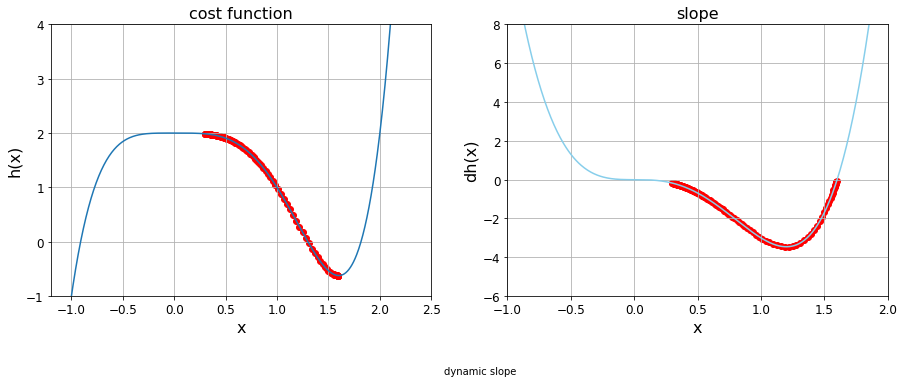

In [18]:
local_min, list_x, deriv_list, it_list = gradient_descent(dh, 0.3, 0.009, max_iter=500)

#ploting the curve and the slope in GD

plt.figure(figsize=(15,5))
plt.subplot(1 , 2 , 1)
plt.plot(x_3, h(x_3))
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('cost function', fontsize=16)
values = np.array(list_x)
plt.scatter(list_x, h(values), c='red')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), c='skyblue')
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1,2)
plt.ylim(-6,8)
plt.title('slope', fontsize=16)
plt.text(-1.5,-10,'dynamic slope')
plt.scatter(list_x, deriv_list, c='red')
plt.grid()

plt.show()


      

In [19]:

print(f'Local min is at {local_min}')
print(f'Number of steps: {len(list_x)}')
print(f'cost at this minimum is: {h(local_min)}')

Local min is at 1.59603810208793
Number of steps: 139
cost at this minimum is: -0.6212800609919586


In [20]:
import sys
sys.maxsize

9223372036854775807

In [21]:
sys.float_info.max

1.7976931348623157e+308

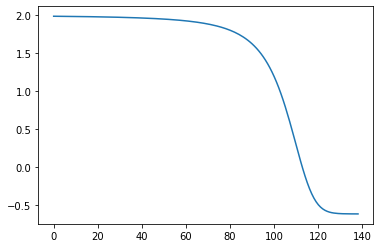

In [22]:
plt.plot(it_list, h(np.array(list_x)))
plt.show()

# Example 4 - Data Viz with 3D Charts 
## Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimuze $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [23]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [24]:
#Make x y Data
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

In [25]:
print('Shape of X array',x_4.shape)

Shape of X array (200,)


In [26]:
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape of X array',x_4.shape)

Shape of X array (200, 200)


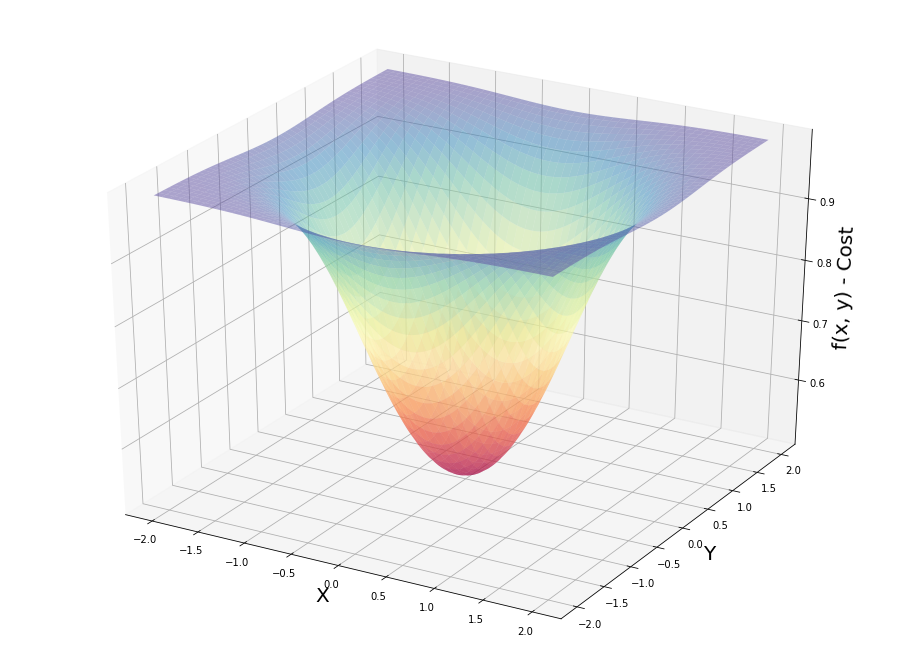

In [27]:
# Generating 3D Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.5)
plt.show()

## Partial Derivatives & Symbolic Computation

In [28]:
from sympy import symbols, diff

In [29]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ',f(a, b))
print(diff(f(a,b), a))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [30]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

## Batch Gradient Descent with SymPy

In [31]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost is', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of 3.45838599885832e-11
Minimum occurs at y value of 1.92132555492129e-11
The cost is 0.500000000000000


# Gradient Descent without SymPy is faster
## Both Partial derivatives are

$$\displaystyle \frac{2 \cdot 3^{- x^{2} - y^{2}} x \log{\left(3 \right)}}{\left(3^{- x^{2} - y^{2}} + 1\right)^{2}}$$

$$\displaystyle \frac{2 \cdot 3^{- x^{2} - y^{2}} y \log{\left(3 \right)}}{\left(3^{- x^{2} - y^{2}} + 1\right)^{2}}$$

In [32]:
print(diff(f(a,b), a))
print(diff(f(a,b), b))

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [33]:
#Partial Derivative functions example for
from math import log

def fpx(x, y):
    r = 3 **(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x, y):
    r = 3 **(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2
    

In [34]:
#check
fpx(1.8, 1)

0.036808971619750504

In [35]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost is', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of 3.458385998858304e-11
Minimum occurs at y value of 1.9213255549212797e-11
The cost is 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [59]:
# Advanced Numpy Array Practice
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
hs_band.shape
hs_band[0][1]

the_roots = np.append(arr=hs_band,values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:,0])
the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('printing band roles...', the_roots[:,1])

(1, 2)
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


In [77]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1,2)
print('Shape of values', values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost is:', f(params[0], params[1]))
values_array

Shape of values (1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of 3.458385998858304e-11
Minimum occurs at y value of 1.9213255549212797e-11
The cost is: 0.5


array([[1.80000000e+00, 1.00000000e+00],
       [1.79631910e+00, 9.97955057e-01],
       [1.79257650e+00, 9.95875836e-01],
       ...,
       [3.87209563e-11, 2.15116424e-11],
       [3.65939904e-11, 2.03299946e-11],
       [3.45838600e-11, 1.92132555e-11]])

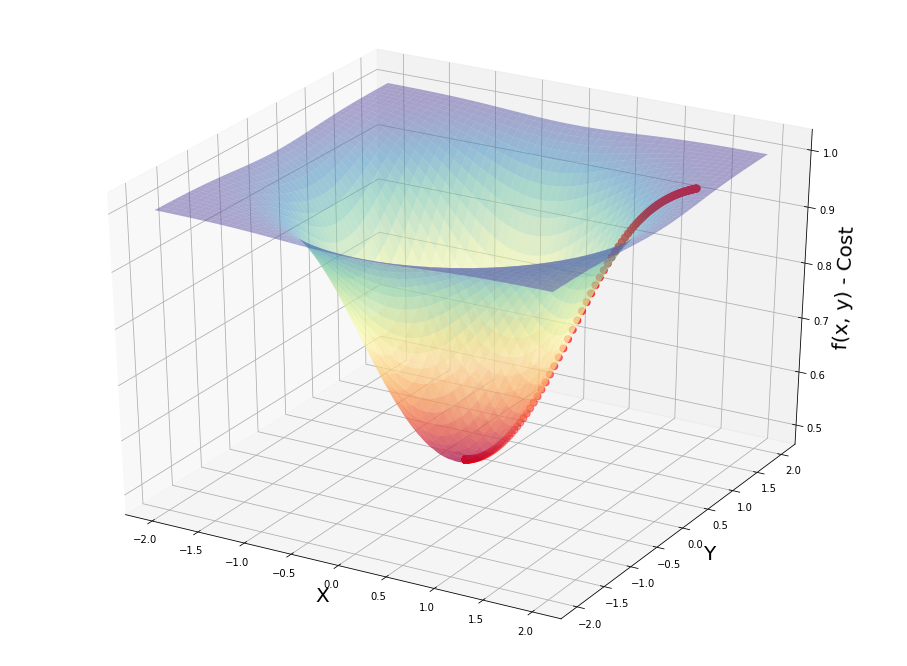

In [78]:
# Generating 3D Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.5)
ax.scatter(values_array[:, 0], values_array[:,1], f(values_array[:, 0], values_array[:,1]), s=50, c='red')
plt.show()

# Example 5 - Working with Data & A Real Cost Function

## Mean Squared Error: a cost function for regression problem

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [85]:
# Make Data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)
print('Shape of x_5 array:',x_5.shape)
print('Shape of y_5 array:',y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [80]:
from sklearn.linear_model import LinearRegression

In [87]:
# Quick linear regression
regr=LinearRegression()
regr.fit(x_5,y_5)
print(f'theta 0 is {regr.intercept_[0]} and theta 1 is {regr.coef_[0][0]}')

theta 0 is 0.8475351486029536 and theta 1 is 1.2227264637835915


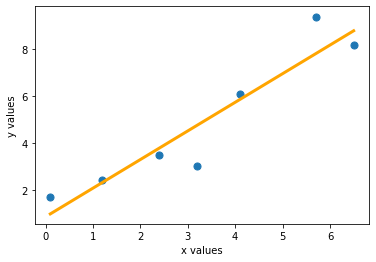

In [96]:
#plt.figure(figsize=(15,15))
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), c='orange', lw=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [103]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print(y_hat)
print(y_5)
print(len(y_5))

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]
7


In [106]:
#MSE
def mse(y, y_hat):
    return ((1/len(y))*sum((y - y_hat)**2))[0]

In [107]:
mse(y_5, y_hat)

0.9479655759794576

## 3D Plot for the MSE Cost Function

In [133]:
# Make data for thetas
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [134]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [148]:
# Plotting MSE


array([[ 3.3],
       [ 6.6],
       [10.2],
       [12.6],
       [15.3],
       [20.1],
       [22.5]])

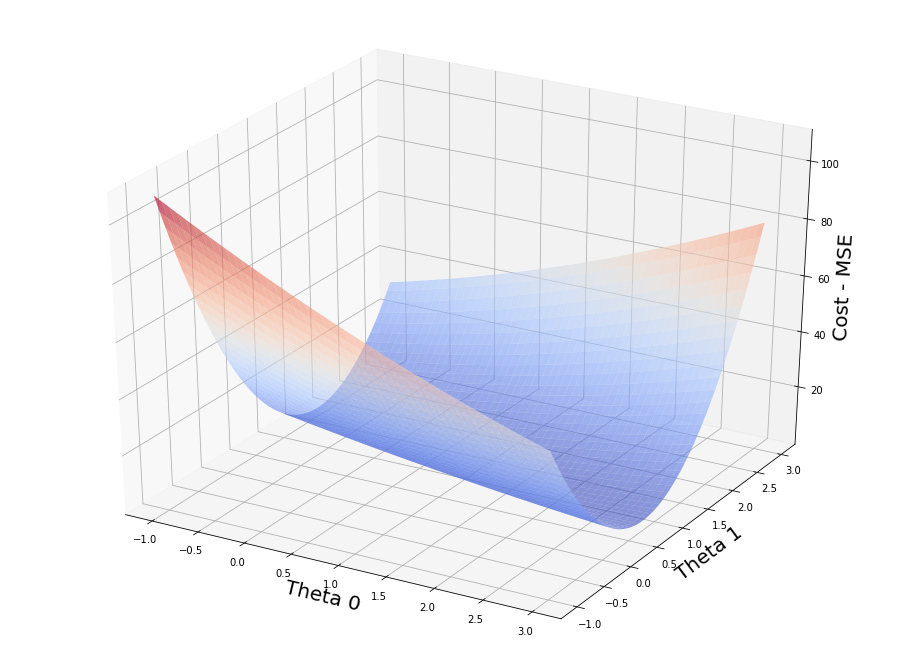

In [137]:
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha=0.6, cmap='coolwarm')
plt.show()

In [145]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j)', ij_min)
print('Min MSE for theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747163
Min occurs at (i, j) (111, 91)
Min MSE for theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for theta 1 at plot_t1[111][91] 1.2311557788944723


# 22. Running Gradient Descent with a MSE Cost Function
## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $$

In [153]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [164]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collect Data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    #append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
    
    
#print results
print('Min occurs at theta 0:', thetas[0])
print('Min occurs at theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at theta 0: 0.8532230461743415
Min occurs at theta 1: 1.2214935332607393
MSE is: 0.9479751138321333


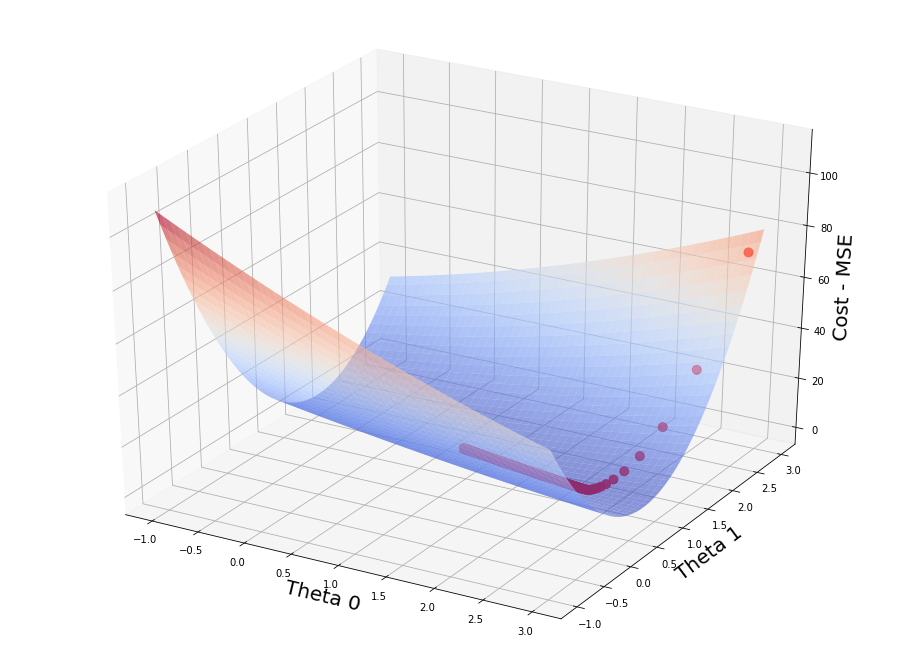

In [165]:
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, c='red')

ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha=0.6, cmap='coolwarm')
plt.show()